<a href="https://colab.research.google.com/github/muthumeenal12/TNEASAMPLE-ANALYSIS/blob/main/Round1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TNEA 2024**
# Seat Analysis AFTER Round 2 (2024)

###*COLLEGE*:

REC- RAJALAKSHMI ENGINEERING COLLEGE

RIT - RAJALAKSHMI INSTITUTE OF TECHNOLOGY

SAVEETHA - SAVEETHA ENGINEERING COLLEGE

PEC - PANIMALAR ENGINEERING COLLEGE

SEC- SRI SAI RAM ENGINEERING COLLEGE

SIT- SRI SAI RAM INSTITUTE OF TECHNOLOGY

SJEC - St.Joseph ENGINEERING COLLEGE

SJIT - St. Joseph INSTITUTE OF TECHNOLOGY

SVCE - SRI VENKATESTWARA ENGINEERING COLLEGE

###*DEPARTMENT:*
'AD' - Artificial Intelligence & Data Science

'AL' - Artificial Intelligence & Machine Learning

'BT' - Bio Technology

'CSBS' - Computer Science & Business System

'CCE' - Computer Comm. and Engg.

'CSE' - Computer Science and Engg.

'ECE' -  Electronics and Communication Engineering

'VLSA' - Electronics Engineering (VLSI Design and Technology)

'EEE' - ELECTRICAL AND ELECTRONICS ENGINEERING

'IT' - INFORMATION TECHNOLOGY

'IOT' - Computer Science and Engineering (Internet of Things)

'MTECH' - M.Tech. Computer Science and Engineering (Integrated 5 years)

'EIE' - ELECTRONICS AND INSTRUMENTATION ENGINEERING

'EIC' - Electronic Instrumentation and Control Engineering

'SC' - Computer Science and Engineering (Cyber Security)

'BM' - BIO MEDICAL ENGINEERING

'CSD' - COMPUTER SCIENCE AND DESIGN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('seat_allotment.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CollegeName    76 non-null     object 
 1   DeptName       76 non-null     object 
 2   NoOfSeats(BC)  76 non-null     int64  
 3   CuttOff2023    69 non-null     float64
 4   CODE           76 non-null     int64  
 5   INTAKE         76 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.7+ KB


In [5]:
df.head()

,CollegeName,DeptName,NoOfSeats(BC),CuttOff2023,CODE,INTAKE
0,RIT,AD,0,183.0,1432,420
1,RIT,AL,0,180.0,1432,180
2,RIT,BT,0,NaN,1432,60
3,RIT,CSBS,2,179.0,1432,180
4,RIT,CCE,4,178.5,1432,120


In [26]:
df.DeptName.unique()

array(['AD', 'AL', 'BT', 'CSBS', 'CCE', 'CSE', 'ECE', 'VLSA', 'EEE', 'IT',
       'IOT', 'MTECH', 'EIE', 'EIC', 'SC', 'BM', 'CSD'], dtype=object)

In [6]:
# Group data by CollegeName
colleges = df['CollegeName'].unique()

# Number of unique colleges
num_colleges = len(colleges)

In [7]:
# Determine grid size for subplots (let's use a square-like grid)
rows = cols = int(num_colleges**0.5)
if rows * cols < num_colleges:
    cols += 1

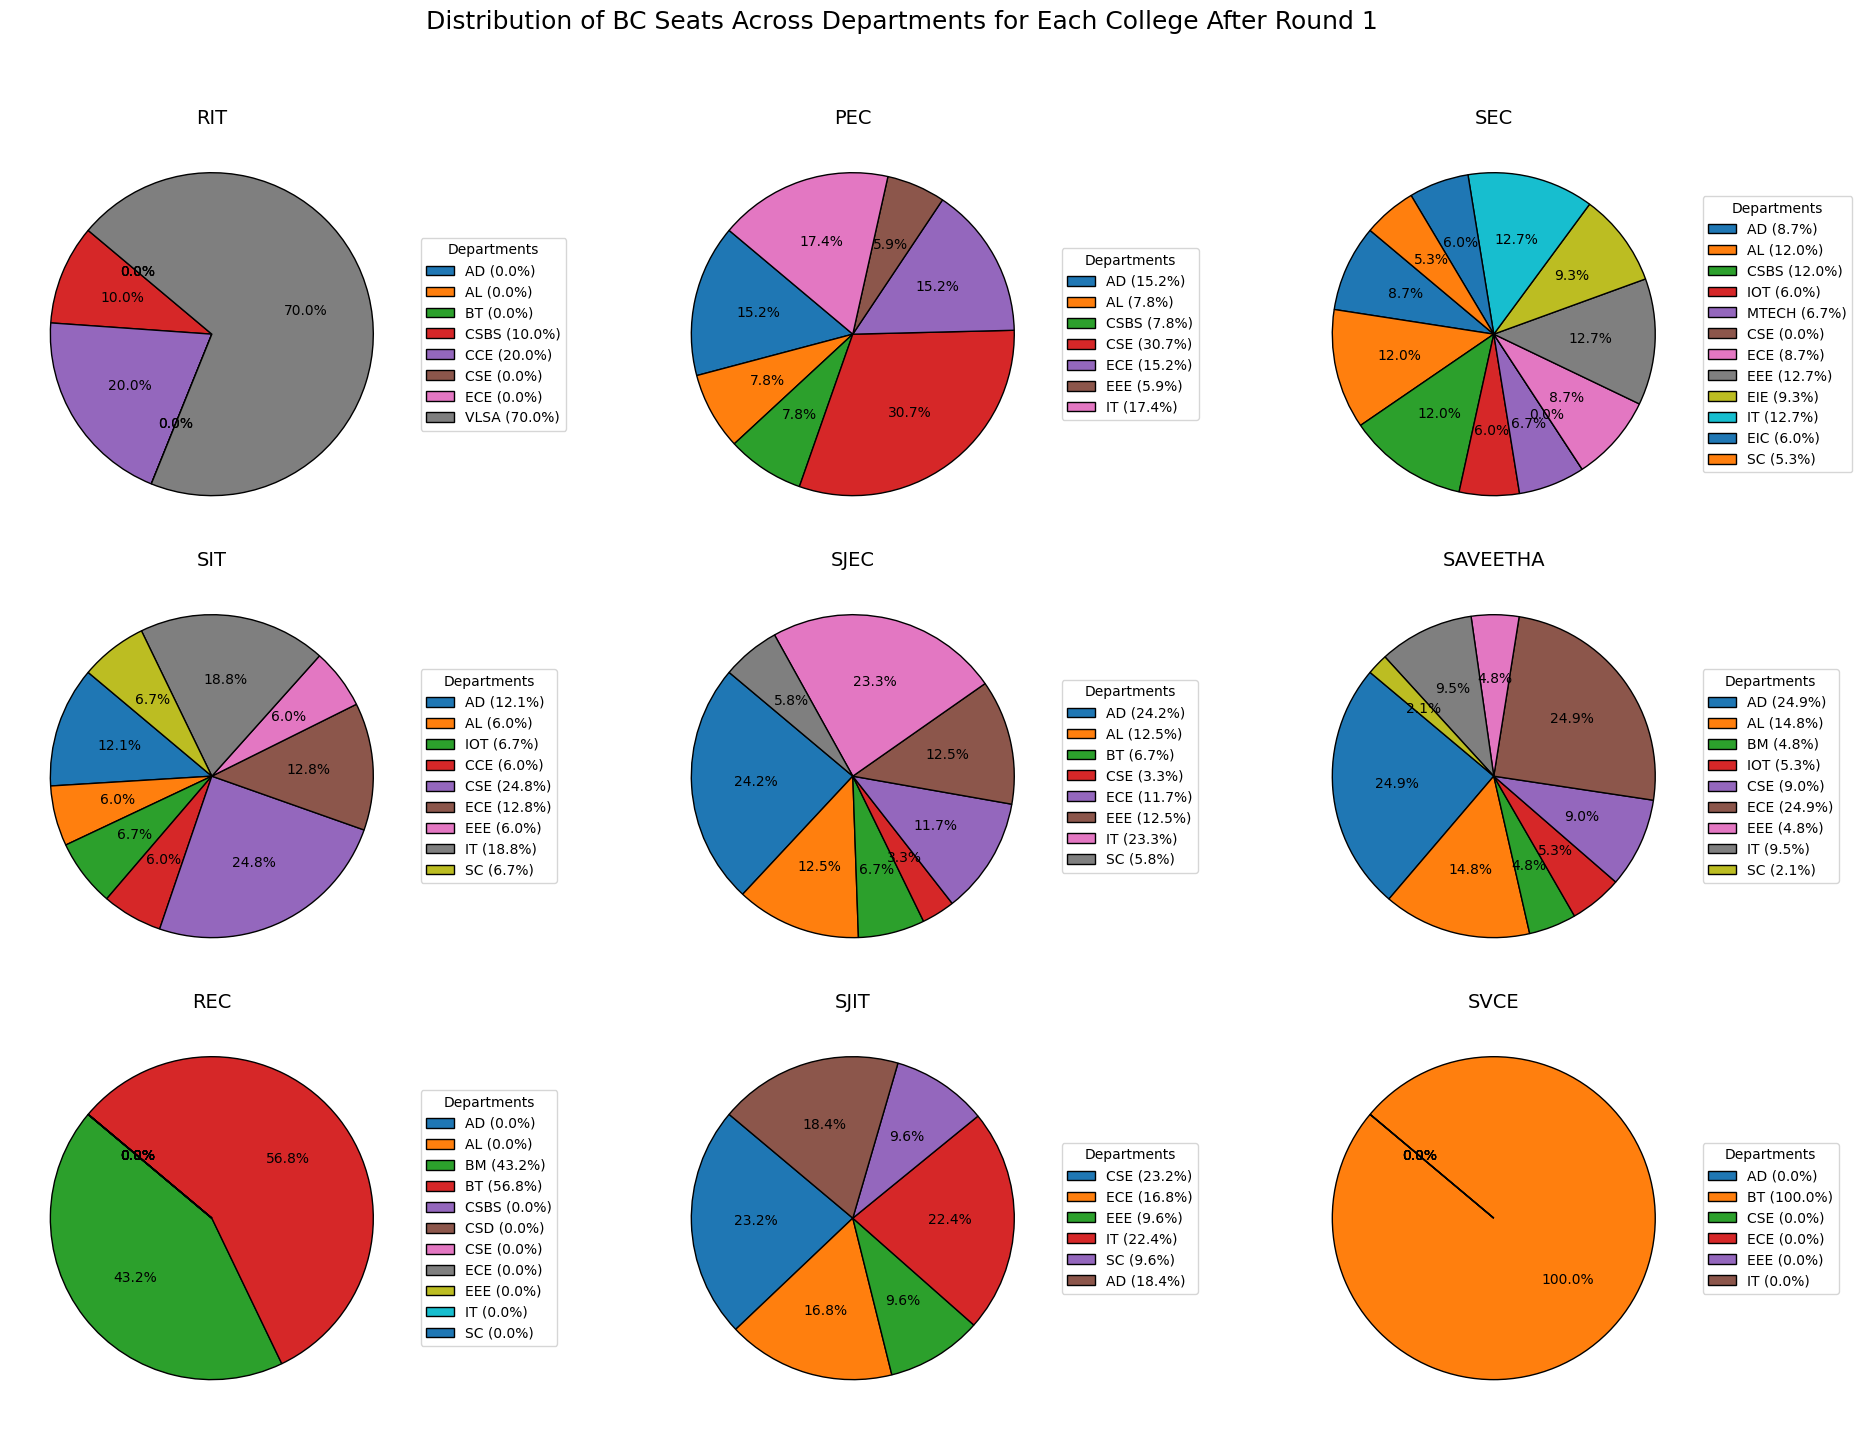

In [8]:
# Create a figure with subplots
fig, axs = plt.subplots(rows, cols, figsize=(20, 15))
fig.suptitle('Distribution of BC Seats Across Departments for Each College After Round 1', fontsize=18)

# Plot each college's pie chart in the subplot
for i, college in enumerate(colleges):
    college_data = df[df['CollegeName'] == college]
    row = i // cols
    col = i % cols

    wedges, texts, autotexts = axs[row, col].pie(college_data['NoOfSeats(BC)'], autopct='%1.1f%%', startangle=140,
                                                 wedgeprops={'edgecolor': 'black'})
    axs[row, col].set_title(college, fontsize=14)

    # Combine department names with percentages
    labels = [f'{dept} ({pct})' for dept, pct in zip(college_data['DeptName'], [w.get_text() for w in autotexts])]

    # Create a legend outside the pie chart
    axs[row, col].legend(wedges, labels, title="Departments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Remove empty subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axs[j // cols, j % cols])

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [9]:
# Summary bar chart
bc_totals = df.groupby('CollegeName')['NoOfSeats(BC)'].sum()
bc_totals

,NoOfSeats(BC)
CollegeName,
PEC,374
REC,37
RIT,20
SAVEETHA,189
SEC,150
SIT,149
SJEC,120
SJIT,125
SVCE,7


In [10]:
total_seats = df.groupby('CollegeName')['INTAKE'].sum()
total_seats

,INTAKE
CollegeName,
PEC,3120
REC,2460
RIT,1800
SAVEETHA,1500
SEC,1530
SIT,960
SJEC,1320
SJIT,960
SVCE,840


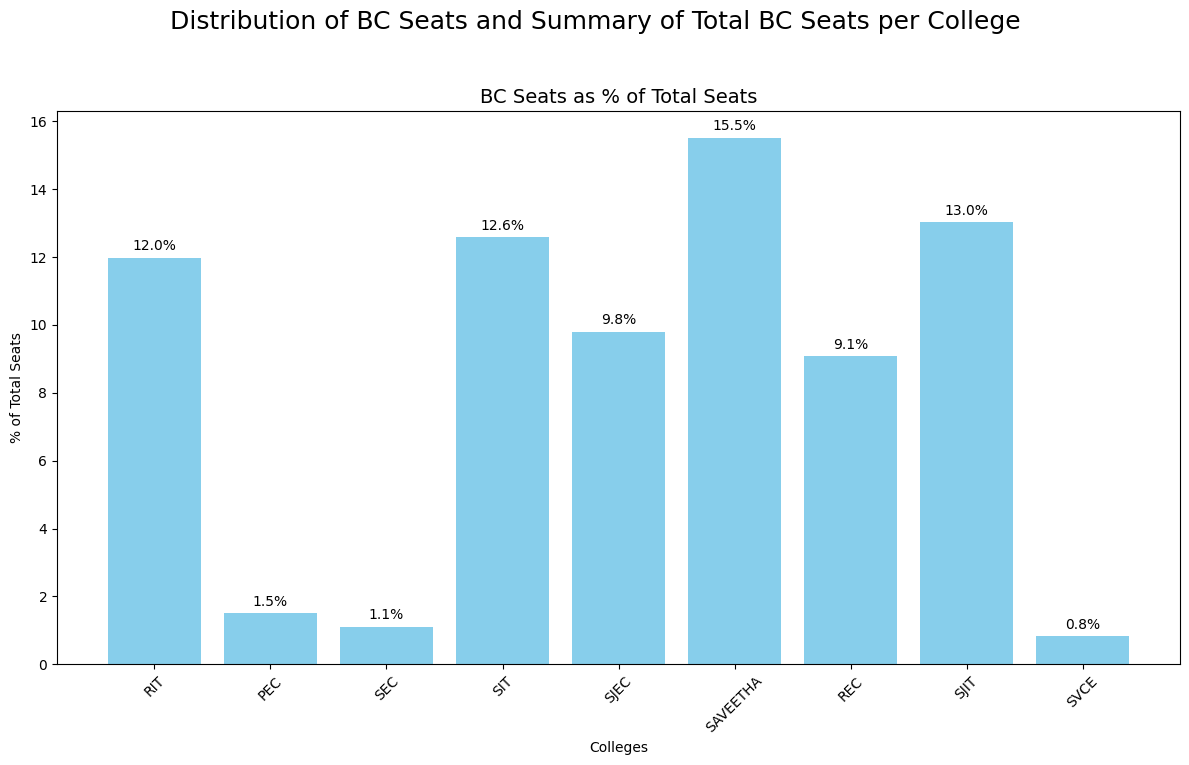

In [11]:
    # Get unique colleges
colleges = df['CollegeName'].unique()

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle('Distribution of BC Seats and Summary of Total BC Seats per College', fontsize=18)



bar_plot = ax.bar(colleges, bc_totals / total_seats * 100, color='skyblue')

# Annotate bars
for bar in bar_plot:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

ax.bar(colleges, bc_totals / total_seats * 100, color='skyblue')
ax.set_title('BC Seats as % of Total Seats', fontsize=14)
ax.set_ylabel('% of Total Seats')
ax.set_xlabel('Colleges')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

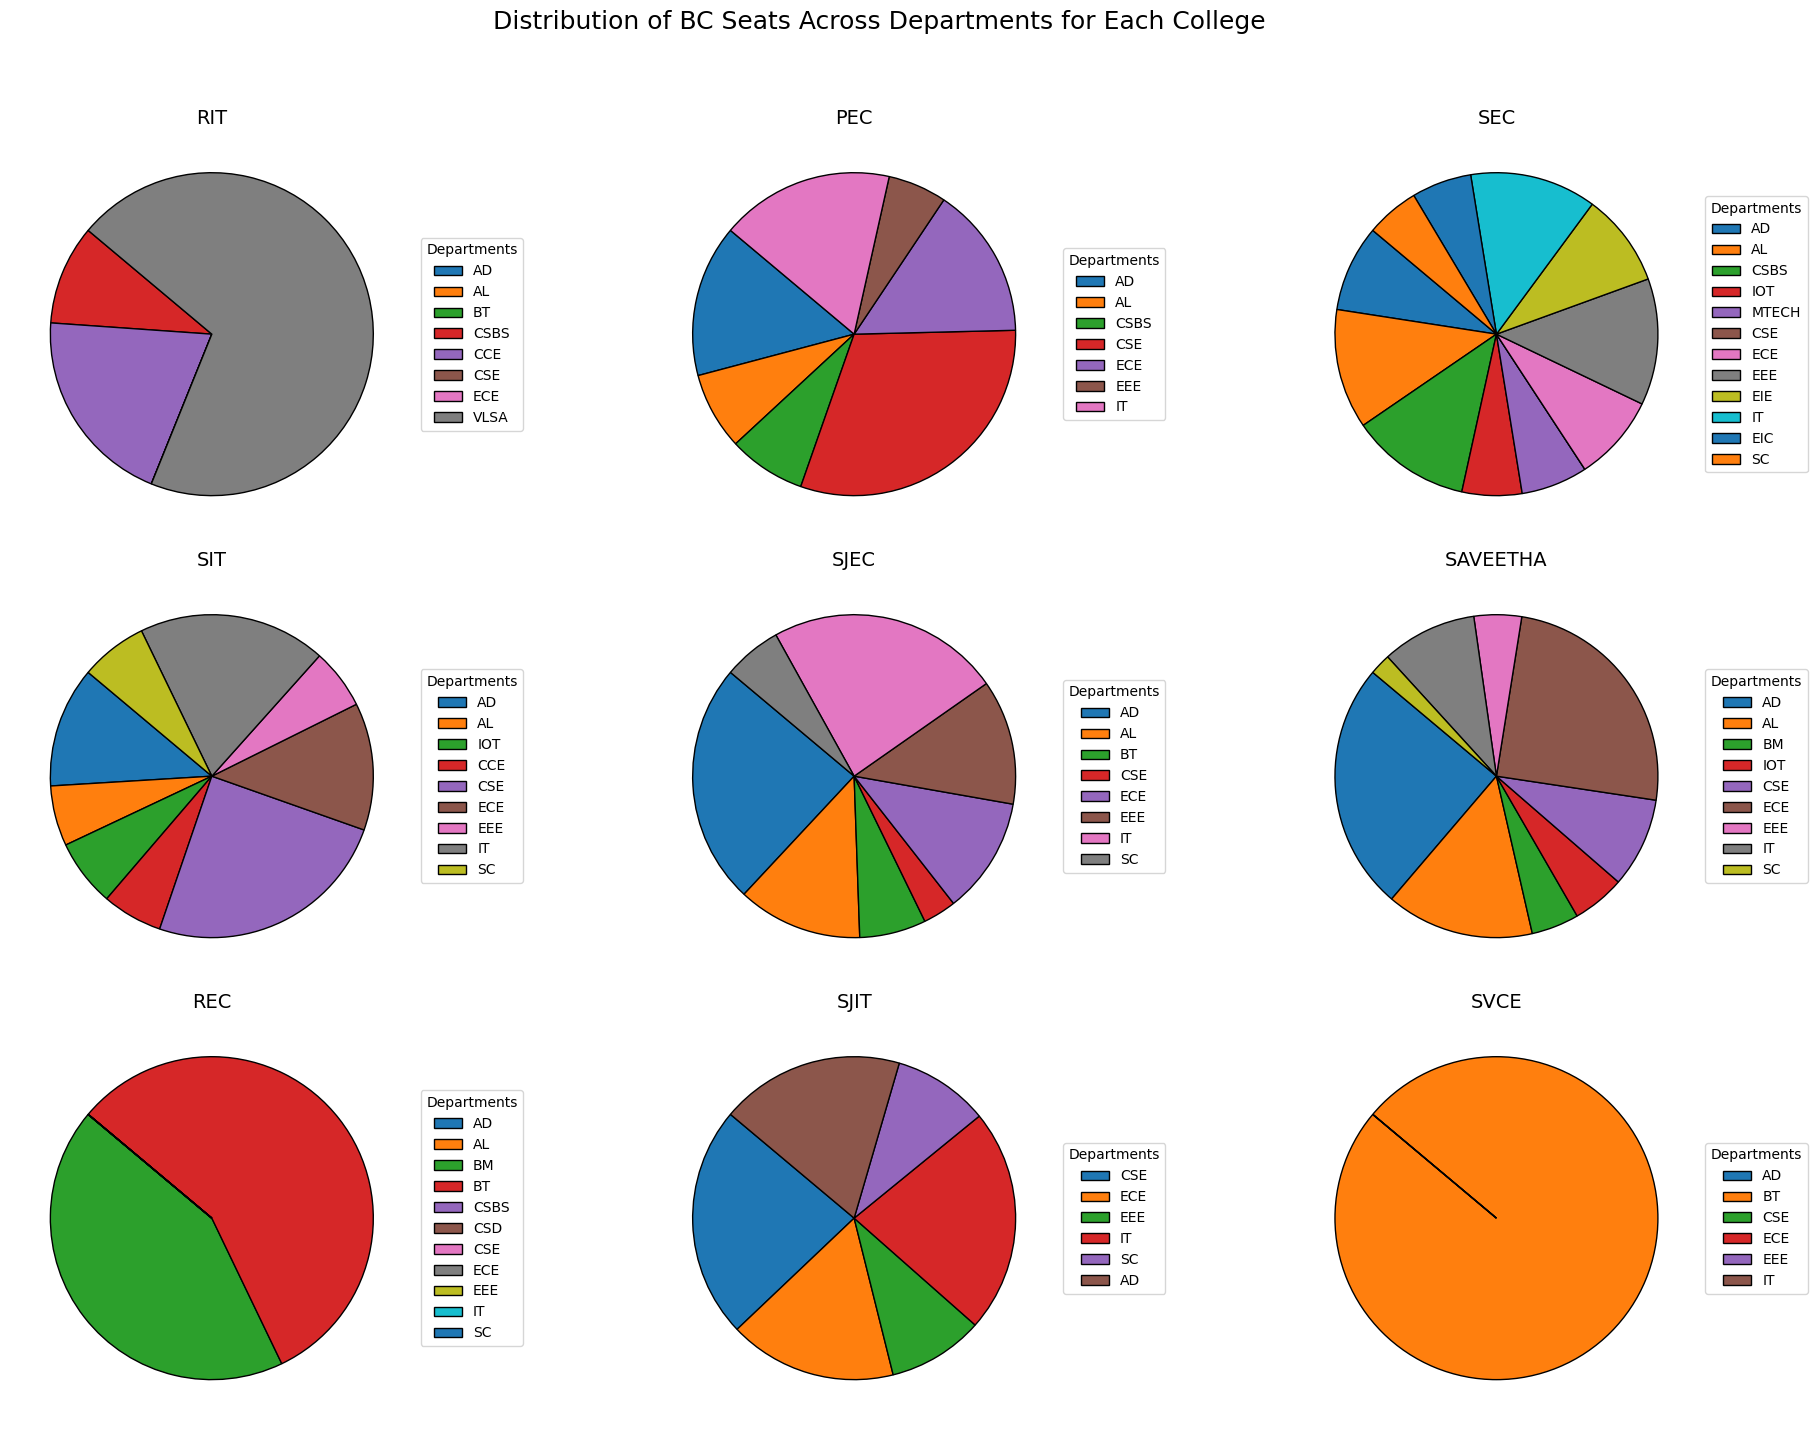

In [ ]:
# @title [optional]
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'seat_allotment.csv'
df = pd.read_csv(file_path)

# Group data by CollegeName
colleges = df['CollegeName'].unique()

# Number of unique colleges
num_colleges = len(colleges)

# Determine grid size for subplots (let's use a square-like grid)
rows = cols = int(num_colleges**0.5)
if rows * cols < num_colleges:
    cols += 1

# Create a figure with subplots
fig, axs = plt.subplots(rows, cols, figsize=(20, 15))
fig.suptitle('Distribution of BC Seats Across Departments for Each College', fontsize=18)

# Plot each college's pie chart in the subplot
for i, college in enumerate(colleges):
    college_data = df[df['CollegeName'] == college]
    row = i // cols
    col = i % cols

    wedges, _ = axs[row, col].pie(college_data['NoOfSeats(BC)'], startangle=140, wedgeprops={'edgecolor': 'black'})
    axs[row, col].set_title(college, fontsize=14)

    # Create a legend outside the pie chart
    axs[row, col].legend(wedges, college_data['DeptName'], title="Departments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Remove empty subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axs[j // cols, j % cols])

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [20]:
#Let's say the cutoff of the student be 156.
cutoff=156
data = df[df['CuttOff2023'] <=cutoff]
data.head()


,CollegeName,DeptName,NoOfSeats(BC),CuttOff2023,CODE,INTAKE
9,PEC,AL,29,155.0,1210,240
10,PEC,CSBS,29,154.0,1210,240
12,PEC,ECE,57,155.5,1210,480
13,PEC,EEE,22,144.5,1210,180
23,SEC,EIE,14,155.0,1419,90


In [ ]:
df

,CollegeName,DeptName,NoOfSeats(BC),CuttOff2023,CODE,INTAKE
0,RIT,AD,0,183.0,1432,420
1,RIT,AL,0,180.0,1432,180
2,RIT,BT,0,NaN,1432,60
3,RIT,CSBS,2,179.0,1432,180
4,RIT,CCE,4,178.5,1432,120
...,...,...,...,...,...,...
71,SVCE,BT,7,165.0,1219,60
72,SVCE,CSE,0,190.5,1219,240
73,SVCE,ECE,0,185.0,1219,180
74,SVCE,EEE,0,177.5,1219,120


In [21]:
data.to_csv('data.csv')

NOTE:  This is done for educational purpose only.